# PTSNet - Analytics Functionalities
The analytics functionalities allow users to determine the: 

- time step that best fits their application (`plot_wave_speed_error`);
- number of processors that best fit their application (`compute_num_processors`);
- simulation times (`compute_simulation_times`); 

Currently, the parallel version of PTSNet is only available of Linux and Mac OS. Any analytics functionality that requires parallel PTSNet will not work on Windows.

## Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ptsnet.simulation.sim import PTSNETSimulation
from ptsnet.utils.io import get_example_path
from ptsnet.graphics.static import plot_wave_speed_error
from ptsnet.utils.analytics import compute_num_processors
from ptsnet.utils.analytics import compute_simulation_times

## Plotting Wave Speed Error

Users can plot the wave speed error for a given time step to assess the relative wave speed adjustment to help determine the time step for the simulation using the `plot_wave_speed_error` function. The function requires:  
- `sim` - simulation instance;
- `file name` - name of the file to save the plot;
- `intervals` - for the plot;

Note, users don't need to execute the simulation. We will use the large network BWSNII to illustrate this functionality. 

C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\ptsnet\lib\site-packages\wntr\epanet\io.py:2192: UserWarning: Not all curves were used in "C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\ptsnet\lib\site-packages\ptsnet\examples\BWSN_F.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


PTSNETSimulation <duration = 20 [s] | time_steps = 200 | num_points = 46,642>


<Figure size 800x320 with 0 Axes>

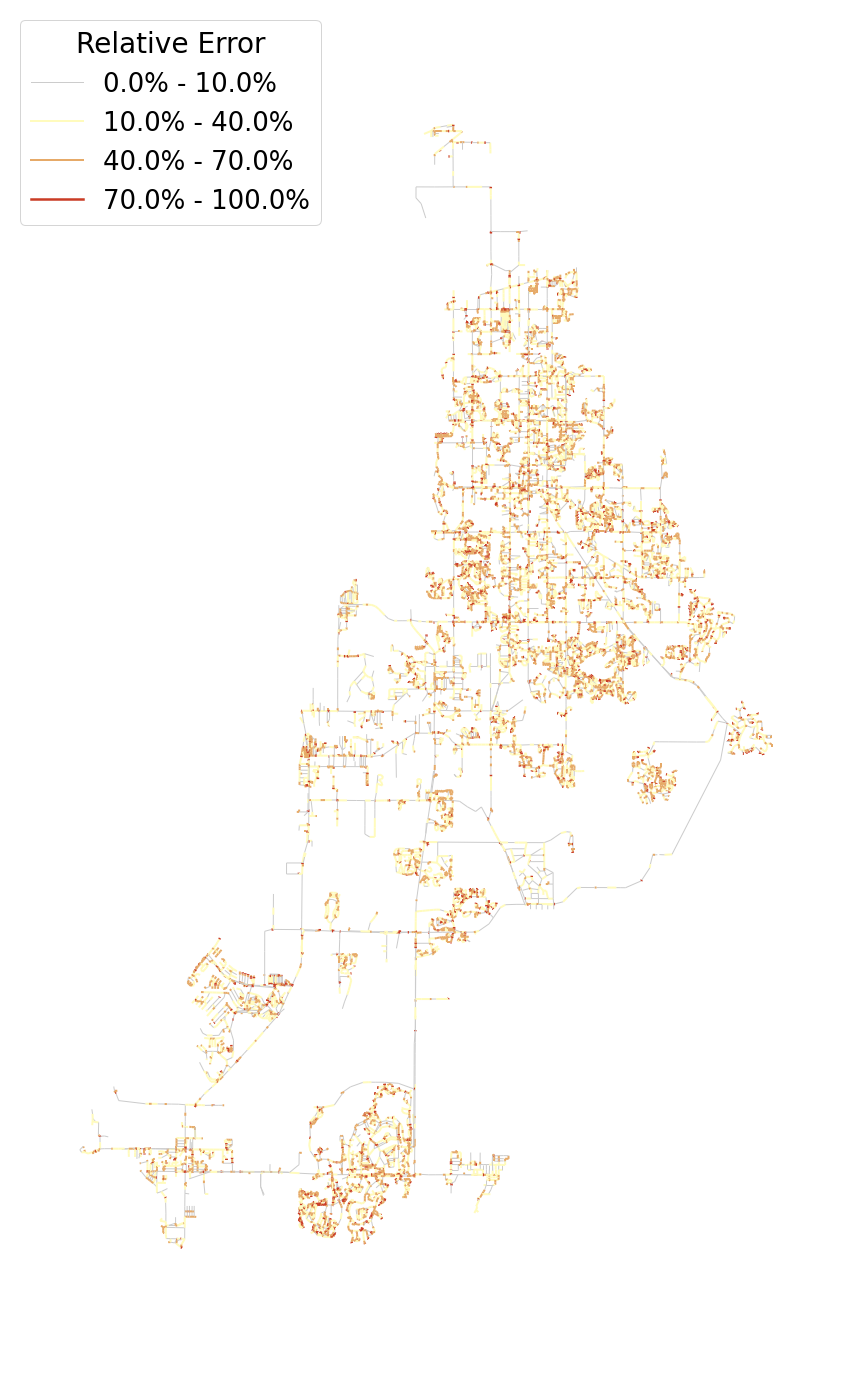

In [5]:
# create a simulation
# set large time step (0.1s) and 'user' wave speed adjustment method

sim = PTSNETSimulation(workspace_name="plot_wave_speed", inpfile = get_example_path('BWSN_F'), settings = {
        'time_step' : 0.1, 'wave_speed_method' : 'user'}); 

# print the number of timesteps and points in the numerical grid (depends on the time step)
print(sim)

# plot wave speed adjustments
plot_wave_speed_error(sim, 'BWSNerror1.pdf', intervals = [0, 10, 40, 70, 100])
plt.show()

### Choose a smaller time step

C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\ptsnet\lib\site-packages\wntr\epanet\io.py:2192: UserWarning: Not all curves were used in "C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\ptsnet\lib\site-packages\ptsnet\examples\BWSN_F.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


PTSNETSimulation <duration = 20 [s] | time_steps = 20000 | num_points = 1,859,159>


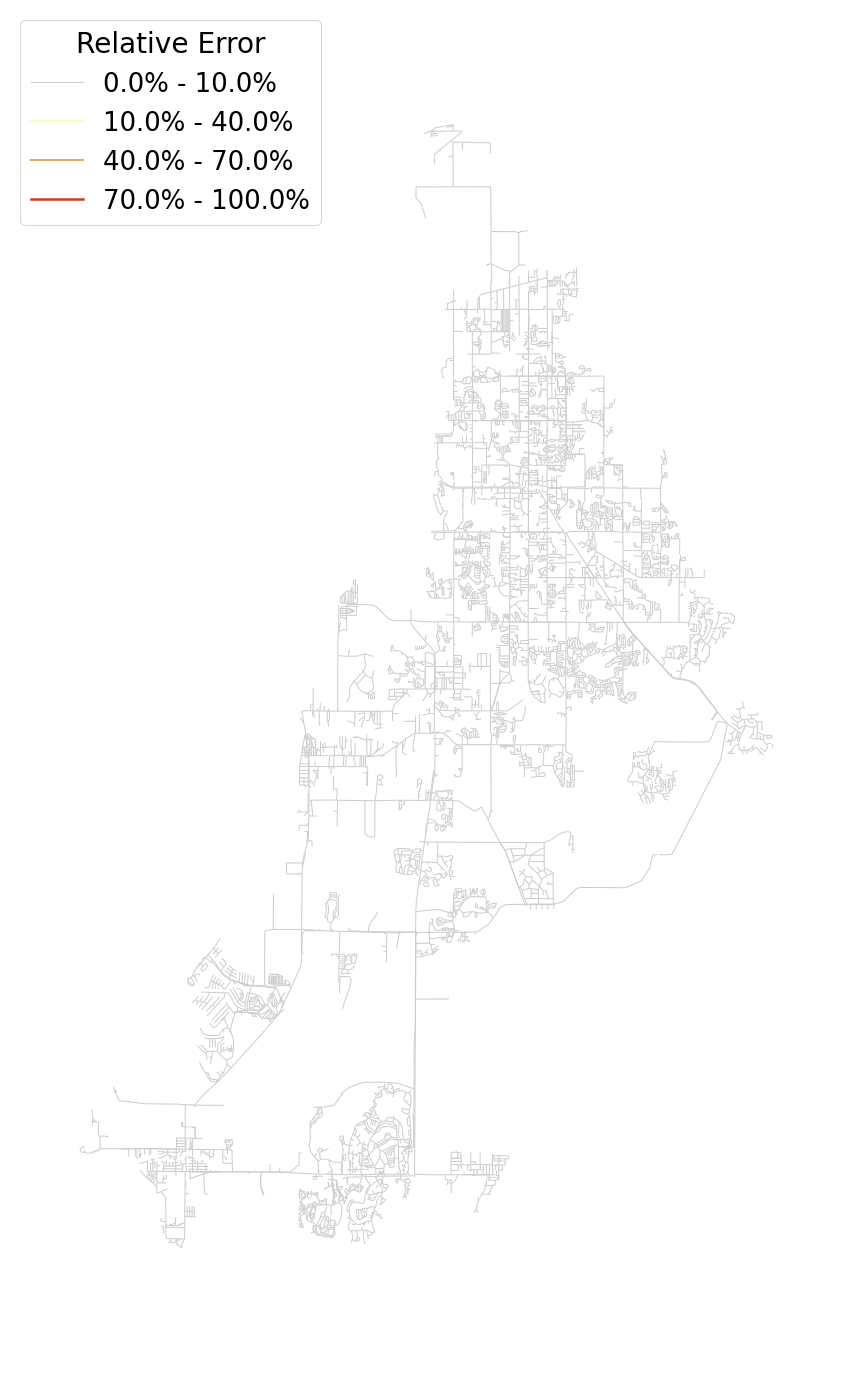

In [6]:
# create a simulation
# set small time step (0.001s) and 'user' wave speed adjustment method

sim = PTSNETSimulation(workspace_name="plot_wave_speed", inpfile = get_example_path('BWSN_F'), settings = {
        'time_step' : 0.001, 'wave_speed_method' : 'user'}); 

# print the number of timesteps and points in the numerical grid (depends on the time step)
print(sim)

# plot wave speed adjustments
plot_wave_speed_error(sim, 'BWSNerror2.pdf', intervals = [0, 10, 40, 70, 100])
plt.show()

---

<font color='red'> if we can extract the wave speed adjustment as variable, then add histogram of the wave speed errors.
    

## Determining Number of Processors
First, a PTSNETSimulation is created and, then, the `compute_num_processors` function is executed. The function computes the average running time per step for each processor for different number of processors and a fixed time step defined by the user. Users can specify the number of steps that they want to compute, instead of running a full simulation. 

The function creates a script that needs to be executed from the command line. This must be directly done on a terminal. The command will not work correctly if executed from a Jupyter Notebook. The `compute_num_processors` requires the following input:
- `sim` - simulation;
- `plot` - <font color='red'> to complete ...;
- `count` - <font color='red'> to complete ...;
- `steps` - <font color='red'> to complete ...; 
- `max_num_processors` - is the number of <font color='red'> to complete ...;

In [17]:
# create simulation
sim = PTSNETSimulation(
    workspace_name = "num_processors",
    inpfile = 'TNET3.inp',
    settings = {
        'time_step' : 0.01,
        'save_results' : True,
        'default_wave_speed' : 1000,
        'wave_speed_method' : 'user'
})

# run this function
compute_num_processors(sim, plot = False, count = 4, steps = 1000, max_num_processors = 8)


Execute the following commands on your terminal:
cd C:\Users\ps28866\Box Sync\work with Gerardo\ptsnet_tests_09132022\test codes
bash C:\Users\ps28866\Box Sync\work with Gerardo\ptsnet_tests_09132022\test codes\workspaces\tmp\compute_num_processors.sh



---

## Estimating Simulation Times
First, a PTSNETSimulation is created and, then, the `compute_simulation_times` function is executed. The function estimates the total amount of time that will be required to execute the simulations for different time steps and a given number of processors. 
Users can specify the number of steps that they want to compute, instead of running a full simulation. 

The function creates a script that need to be executed from the command line. This must be directly done on a terminal. The command will not work correctly if executed from a Jupyter Notebook.

The `compute_simulation_times` requires the following input:
- `inpfile` - is the .inp file;
- `time_steps` - simulation;
- `plot` - <font color='red'> to complete ...;
- `steps` - <font color='red'> to complete ...;
- `count` - <font color='red'> to complete ...;
- `duration` - <font color='red'> to complete ...; 
- `max_num_processors` - is the number of <font color='red'> to complete ...;

In [7]:
compute_simulation_times(
    inpfile = 'TNET3.inp',
    time_steps = [0.0005*ii for ii in range(1,4)],
    plot = False,
    steps = 100,
    count = 4,
    duration = 20,
    max_num_processors = 8
)


Execute the following commands on your terminal:
cd C:\Users\ps28866\Box Sync\work with Gerardo\working files\Shared folder (Gerardo)\0 Publications\0 Journal\PTSNET\ptsnet_tests_09132022\test codes
bash C:\Users\ps28866\Box Sync\work with Gerardo\working files\Shared folder (Gerardo)\0 Publications\0 Journal\PTSNET\ptsnet_tests_09132022\test codes\workspaces\tmp\compute_times_per_step.sh

